# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Set desired Temperature unit
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# Note: .enumerate() function returns an object with both an index and corresponding values (essentially it adds an index)
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    # Note: '%s' concatenates strings with corresponding variables in parentheses at end of line
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Get weather data
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json["weather"][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]['lat']
        city_lng = weather_json["coord"]['lon']
        city_max_temp = weather_json["main"]['temp_max']
        city_humidity = weather_json["main"]['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lazaro cardenas
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | new glasgow
Processing Record 5 of Set 1 | severobaykal'sk
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | peace river
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | ilha de mocambique
Processing Record 15 of Set 1 | gizo
Processing Record 16 of Set 1 | fort st. john
Processing Record 17 of Set 1 | pucon
Processing Record 18 of Set 1 | kitimat
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | opuwo
Processing Record 22 of Set 1 | 'ohonua
City not fou

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lazaro cardenas,17.9583,-102.2000,29.65,72,60,4.47,MX,1688946138
1,grytviken,-54.2811,-36.5092,-5.89,82,18,3.97,GS,1688945951
2,albany,42.6001,-73.9662,21.14,93,100,0.61,US,1688946177
3,new glasgow,45.5834,-62.6486,20.88,89,26,2.28,CA,1688946177
4,severobaykal'sk,55.6500,109.3167,16.65,75,97,0.97,RU,1688946178


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_mine.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_mine.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lazaro cardenas,17.9583,-102.2000,29.65,72,60,4.47,MX,1688946138
1,grytviken,-54.2811,-36.5092,-5.89,82,18,3.97,GS,1688945951
2,albany,42.6001,-73.9662,21.14,93,100,0.61,US,1688946177
3,new glasgow,45.5834,-62.6486,20.88,89,26,2.28,CA,1688946177
4,severobaykal'sk,55.6500,109.3167,16.65,75,97,0.97,RU,1688946178


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

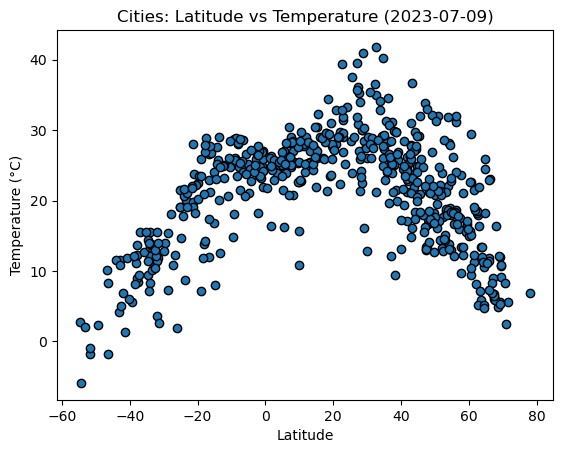

In [21]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors= "black")

# Incorporate the other graph properties
# Give title and label x and y axes
plt.title('Cities: Latitude vs Temperature (2023-07-09)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Save the figure
plt.savefig("../output_data/Fig1_mine.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

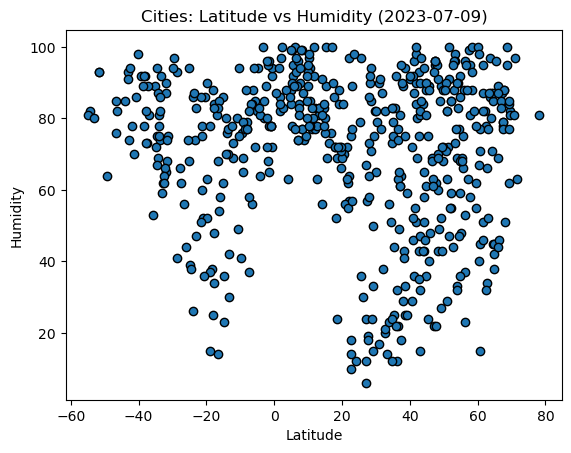

In [22]:
# Build scatter plot for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors= "black")

# Incorporate the other graph properties
# Give title and label x and y axes
plt.title('Cities: Latitude vs Humidity (2023-07-09)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2_mine.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

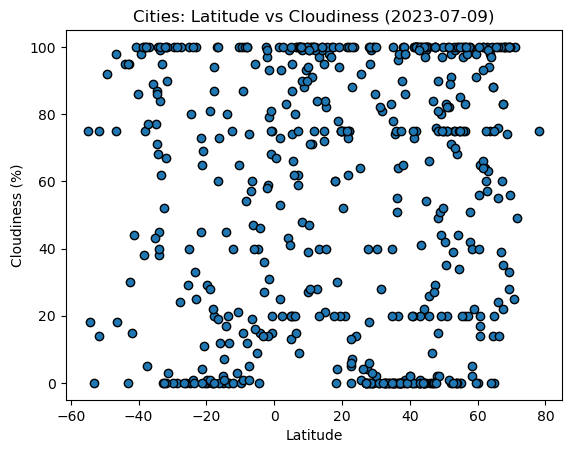

In [23]:
# Build scatter plot for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors= "black")

# Incorporate the other graph properties
# Give title and label x and y axes
plt.title('Cities: Latitude vs Cloudiness (2023-07-09)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3_mine.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

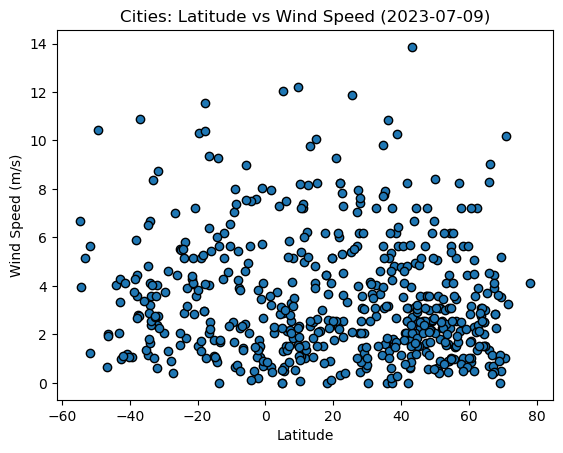

In [24]:
# Build scatter plot for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors= "black")

# Incorporate the other graph properties
# Give title and label x and y axes
plt.title('Cities: Latitude vs Wind Speed (2023-07-09)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4_mine.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")

    # Calculate and annotate line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    x_min, y_min = min(x_values), min(y_values)
    plt.annotate(line_eq,xy=(x_min,y_min),fontsize=15,color="red")
    
    # Display r-value
    print(f'The r-value is: {rvalue}')
    return

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lazaro cardenas,17.9583,-102.2000,29.65,72,60,4.47,MX,1688946138
2,albany,42.6001,-73.9662,21.14,93,100,0.61,US,1688946177
3,new glasgow,45.5834,-62.6486,20.88,89,26,2.28,CA,1688946177
4,severobaykal'sk,55.6500,109.3167,16.65,75,97,0.97,RU,1688946178
5,tiksi,71.6872,128.8694,5.59,63,49,3.26,RU,1688945933


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-5.89,82,18,3.97,GS,1688945951
6,new norfolk,-42.7826,147.0587,11.51,74,95,3.35,AU,1688946040
10,waitangi,-43.9535,-176.5597,11.57,85,95,4.02,NZ,1688945929
11,lebu,-37.6167,-73.6500,8.39,73,5,2.81,CL,1688946180
12,edinburgh of the seven seas,-37.0676,-12.3116,15.60,81,100,10.89,SH,1688945930


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5963342944819358


Text(0, 0.5, 'Maximum Temperature (°C)')

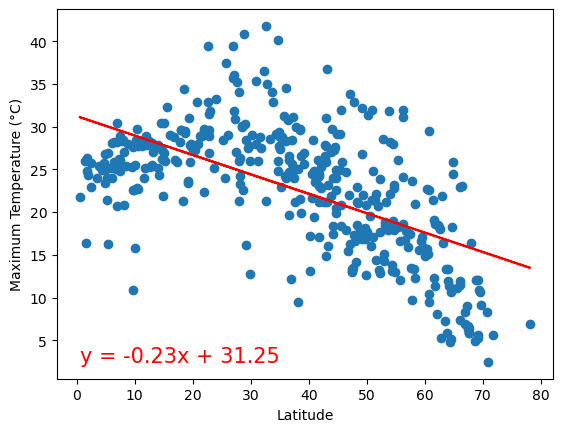

In [28]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')

The r-value is: 0.8393484982392299


Text(0, 0.5, 'Maximum Temperature (°C)')

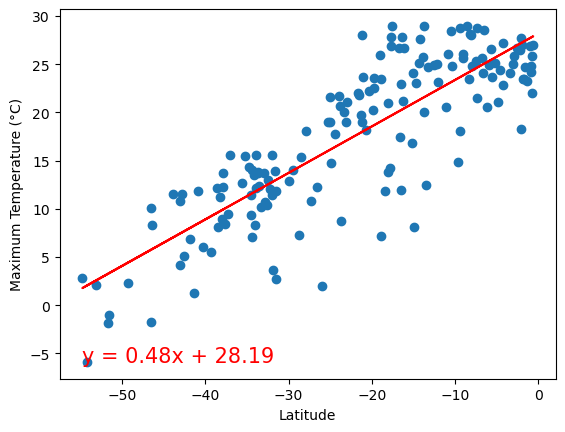

In [29]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')

**Discussion about the linear relationship:**
These data show that there is a linear relationship between the distance from the equator and the maximum temperature. The closer to the equator, the greater the maximum temperature. In this case, the dependent variuable is 'maxiumum temperature' and the independent variable is 'latitude'. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11771389147501374


Text(0, 0.5, 'Humidity')

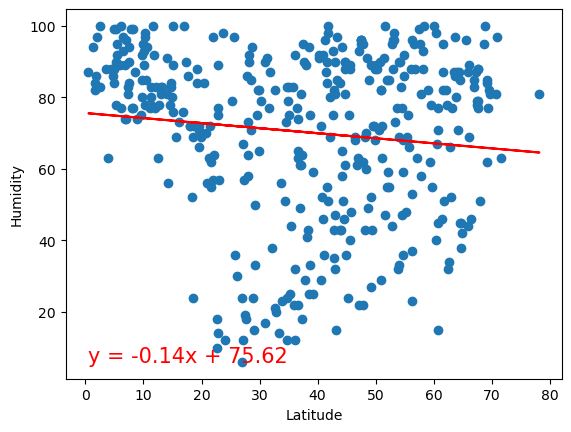

In [30]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-value is: -0.10630269919266319


Text(0, 0.5, 'Humidity')

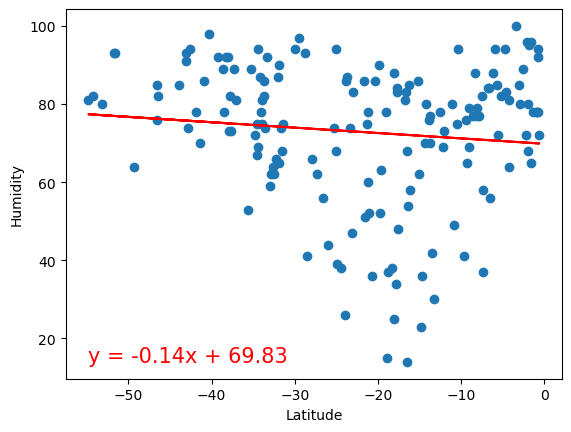

In [31]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** In the Northern Hemisphere, the air is more humid close to the equator, though this relationship is not particularly strong. In the Southern Hemisphere, humidity decreases as you approach the equator, but again, the relationship is not strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.032500873083657296


Text(0, 0.5, 'Cloudiness')

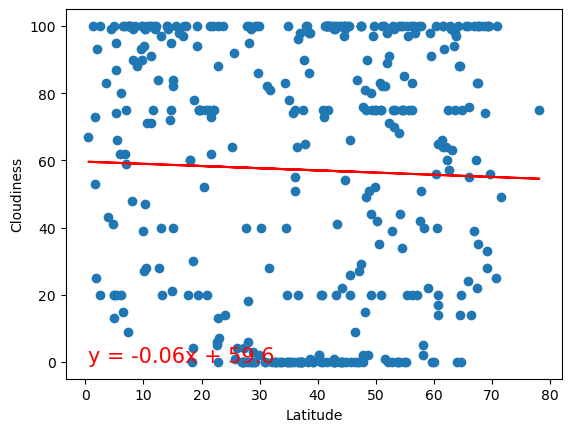

In [32]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is: -0.17403519425679218


Text(0, 0.5, 'Cloudiness')

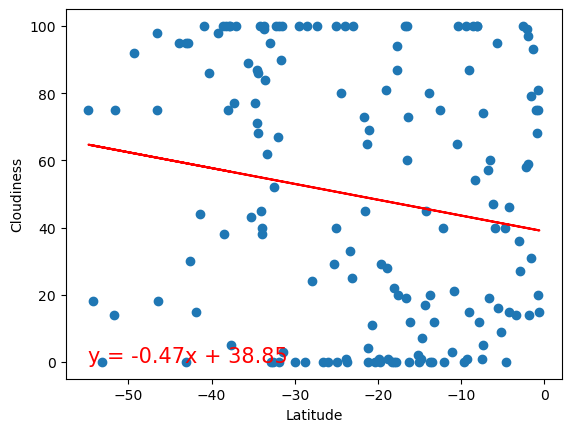

In [33]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** In the Northern Hemisphere, it is slightly cloudier close to the equator, though this relationship is not strong. In the Southern Hemisphere, cloudiness decreases as you approach the equator, but again, the relationship is not strong. It is important to note that these data represent one day. In order to gain more comprehensive insights into this relationship, many days would need to be sampled.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10050185887665955


Text(0, 0.5, 'Wind Speed (m/s)')

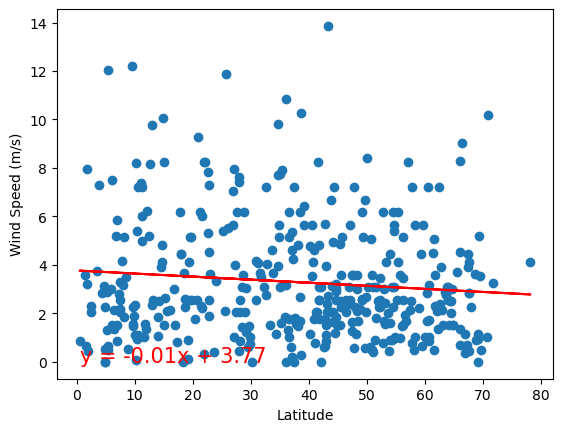

In [34]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

The r-value is: -0.016887284707362706


Text(0, 0.5, 'Wind Speed (m/s)')

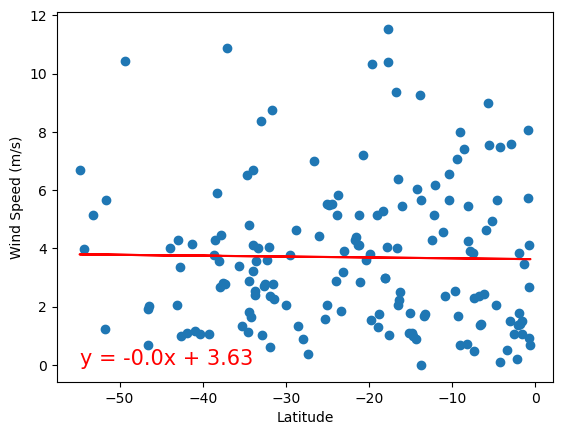

In [35]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** In the Northern Hemisphere, wind speeds are slighty faster close to the equator. In the Southern Hemisphere, the distance from the equator does not affect wind speeds. Similar to the above point, these data represent one day. In order to gain more comprehensive insights into this relationship, many days should be sampled.